## Mini Project 1: AirBnB

## Problem Context 

You are working for a client who wishes to invest in an AirBnB hotel in Amsterdam. Before your client decides to invest, they would like clean data about AirBnB performance in Amsterdam’s markets that ultimately supports a clear recommendation for an investment in a specific market.

**The Problem Statement**

Is there a market potential for investing in an AirBnB in Amsterdam?

If so,

Which neighbourhood?

What property type?

**Analysis Prompts**

1) How much revenue do successful hosts generate?

2) Which property types receive the most positive reviews?

3) Which neighborhoods host the most listings?

4) Which neighborhoods receive the most positive reviews?



**Assumptions Made**

1) The price stated is fixed no matter the amount of guests staying

2) Booking is always for minimum number of nights allowed 

3) Only half of the bookings generate a review

4) Base recommendations purely on revenue

# Importing the Dataset and the libraries

In [1]:
#import various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [2]:
#reading the dataset

airbnb = pd.read_excel('airbnb_data.xlsx',sheet_name ='Sheet1')

#Checking the shape
airbnb.shape

(7833, 33)

In [3]:
#Setting options to diplay the maximum columns 
pd.set_option('max_columns', None)
airbnb.head()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


In [36]:
#Checking Datatypes

airbnb.dtypes

host_id                          int64
host_name                       object
id                               int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
price                            int64
guests_included                  int64
extra_people                     int64
minimum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [37]:
#Checking Info

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7833 non-null   int64  
 1   host_name                    7833 non-null   object 
 2   id                           7833 non-null   int64  
 3   neighbourhood_cleansed       7833 non-null   object 
 4   latitude                     7833 non-null   float64
 5   longitude                    7833 non-null   float64
 6   property_type                7833 non-null   object 
 7   room_type                    7833 non-null   object 
 8   accommodates                 7833 non-null   int64  
 9   price                        7833 non-null   int64  
 10  guests_included              7833 non-null   int64  
 11  extra_people                 7833 non-null   int64  
 12  minimum_nights               7833 non-null   int64  
 13  number_of_reviews 

# Cleaning the Dataset

In [4]:
airbnb.columns
# After looking the data set as well as the problem statement, have decided to remove the following columns
#host_since_year,host_since_anniversary,city,state, zipcode,country,'bathrooms','bedrooms', 'beds', 'bed_type','host_response_time' and 'host_response_rate'

Index(['host_id', 'host_name', 'host_since_year', 'host_since_anniversary',
       'id', 'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'country',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'host_response_time',
       'host_response_rate', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')

In [5]:
#Dropping the irrelevant columns
airbnb = airbnb.drop(labels = ['host_since_year','host_since_anniversary','zipcode','city','state','country','bathrooms','bedrooms','beds','bed_type','host_response_time','host_response_rate'], axis = 1)

In [6]:
#Check for duplicates based on ID
airbnb.duplicated(subset = ('id')).sum()

#drop duplicates 
airbnb_new = airbnb.drop_duplicates(subset = ('id'), keep = False)

#Check for null values
airbnb_new.isnull().any()

host_id                        False
host_name                      False
id                             False
neighbourhood_cleansed         False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
price                          False
guests_included                False
extra_people                   False
minimum_nights                 False
number_of_reviews              False
review_scores_rating            True
review_scores_accuracy          True
review_scores_cleanliness       True
review_scores_checkin           True
review_scores_communication     True
review_scores_location          True
review_scores_value             True
dtype: bool

In [7]:
#Fill in all Nan values of review_scores columns with zero
airbnb_new.loc[:,'review_scores_accuracy']=airbnb_new['review_scores_accuracy'].fillna(0)
airbnb_new.loc[:,'review_scores_cleanliness']=airbnb_new['review_scores_cleanliness'].fillna(0)
airbnb_new.loc[:,'review_scores_checkin']=airbnb_new['review_scores_checkin'].fillna(0)
airbnb_new.loc[:,'review_scores_communication']=airbnb_new['review_scores_communication'].fillna(0)
airbnb_new.loc[:,'review_scores_location']=airbnb_new['review_scores_location'].fillna(0)
airbnb_new.loc[:,'review_scores_value']=airbnb_new['review_scores_value'].fillna(0)
airbnb_new.loc[:,'review_scores_rating']=airbnb_new['review_scores_rating'].fillna(0)

#Filter out listings with 0 reviews
airbnb_new = airbnb_new[airbnb_new.number_of_reviews != 0]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [8]:
airbnb_new.shape

(6175, 21)

In [9]:
#Calculating number of stays based on the assumption
airbnb_new['no_of_stays'] = airbnb_new.number_of_reviews * 2

airbnb_new['est_total_revenue'] = airbnb_new.price * airbnb_new.minimum_nights * airbnb_new.no_of_stays


# Exploratory Data Analysis

**Descriptive Statistics**

In [10]:
airbnb_new.describe()

,host_id,id,latitude,longitude,accommodates,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,no_of_stays,est_total_revenue
count,6.175000e+03,6.175000e+03,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000,6175.000000
mean,9.015036e+06,2.551608e+06,52.366571,4.887739,3.116113,123.736842,1.692308,14.254899,2.481296,17.446316,92.213927,9.315466,9.160972,9.507045,9.560972,9.163725,8.912874,34.892632,9077.339271
std,7.192687e+06,1.574782e+06,0.013928,0.029286,1.746195,74.971088,1.176474,18.829855,1.727912,27.535829,12.627660,1.367366,1.448388,1.330016,1.311087,1.373159,1.380080,55.071658,15661.292033
min,1.662000e+03,2.818000e+03,52.291569,4.763264,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,38.000000
25%,3.317069e+06,1.107687e+06,52.357033,4.869295,2.000000,80.000000,1.000000,0.000000,2.000000,3.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,6.000000,1260.000000
50%,6.999042e+06,2.470950e+06,52.366513,4.886349,2.000000,100.000000,1.000000,0.000000,2.000000,8.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,16.000000,3648.000000
75%,1.369969e+07,3.896992e+06,52.375782,4.902468,4.000000,145.000000,2.000000,25.000000,3.000000,19.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,38.000000,9900.000000
max,3.026041e+07,5.829776e+06,52.425381,5.013616,16.000000,1495.000000,16.000000,235.000000,27.000000,297.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,594.000000,453600.000000


**Neighbourhood Analysis**

In [11]:
#Checking which neighbourhood have the most listings 
airbnb_new.neighbourhood_cleansed.value_counts()

Centrum-West                              1138
De Baarsjes - Oud-West                     985
De Pijp - Rivierenbuurt                    751
Centrum-Oost                               743
Westerpark                                 548
Zuid                                       426
Oud-Oost                                   306
Bos en Lommer                              275
Oostelijk Havengebied - Indische Buurt     257
Oud-Noord                                  147
Watergraafsmeer                            126
Slotervaart                                108
IJburg - Zeeburgereiland                    72
Buitenveldert - Zuidas                      61
Noord-West                                  53
Geuzenveld - Slotermeer                     47
Osdorp                                      32
Noord-Oost                                  32
De Aker - Nieuw Sloten                      26
Bijlmer-Centrum                             20
Bijlmer-Oost                                13
Gaasperdam - 

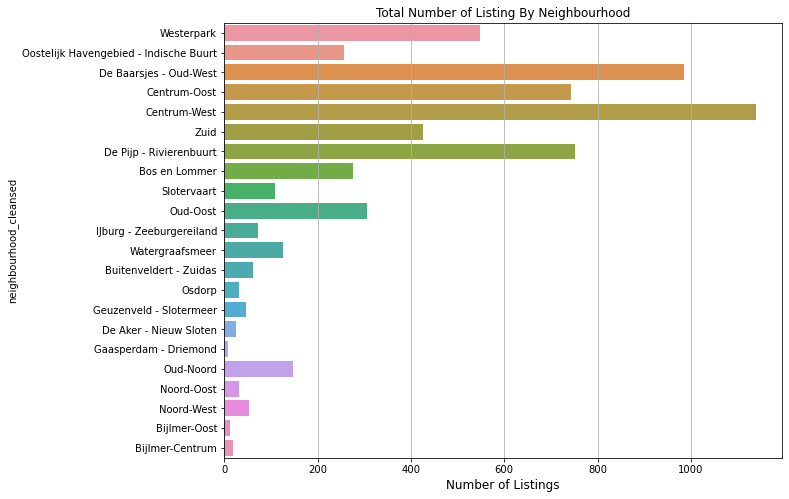

In [12]:
#Plotting a visualisation graph for no of listing by neighbourhood
plt.figure(figsize=(10,8))
plt.grid(True)
sns.countplot(y = 'neighbourhood_cleansed', data=airbnb_new)
plt.xlabel("Number of Listings", fontsize=12)
plt.title('Total Number of Listing By Neighbourhood')
plt.savefig('total_listing_by_neighbourhood', dpi= 150)
plt.show()


In [13]:
#Map Visualisation for number of listings 
amsterdam = folium.Map(location =[52.3676,4.9041])
latitude = airbnb_new['latitude'].tolist()
longitude = airbnb_new['longitude'].tolist()
locations = list(zip(latitude,longitude))

FastMarkerCluster(data = locations).add_to(amsterdam)
display(amsterdam)

**Pricing Analysis**

In [14]:
#Looking at price means by neighbourhood

airbnb_new.groupby(['neighbourhood_cleansed']).price.mean()

neighbourhood_cleansed
Bijlmer-Centrum                            70.050000
Bijlmer-Oost                               59.000000
Bos en Lommer                              91.138182
Buitenveldert - Zuidas                    101.016393
Centrum-Oost                              142.689098
Centrum-West                              156.764499
De Aker - Nieuw Sloten                     76.884615
De Baarsjes - Oud-West                    109.423350
De Pijp - Rivierenbuurt                   120.126498
Gaasperdam - Driemond                      60.444444
Geuzenveld - Slotermeer                    76.361702
IJburg - Zeeburgereiland                  127.194444
Noord-Oost                                 78.531250
Noord-West                                 94.698113
Oostelijk Havengebied - Indische Buurt    102.361868
Osdorp                                     87.593750
Oud-Noord                                 109.258503
Oud-Oost                                  106.029412
Slotervaart            

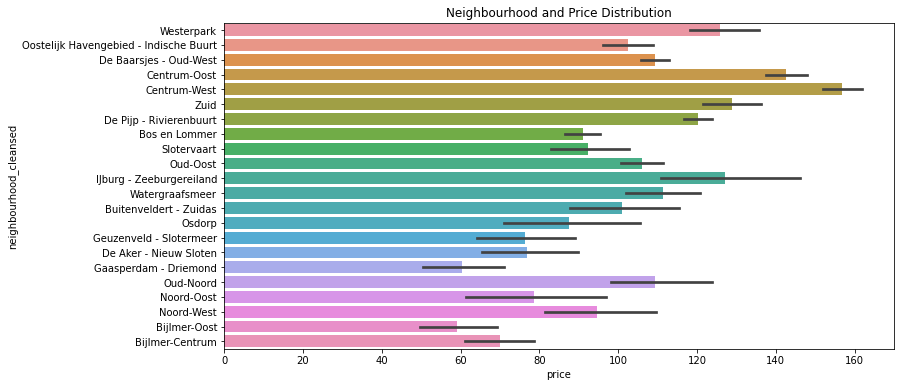

In [15]:
#Plotting Price Distribution and Neighbourhood

plt.figure(figsize = (12,6))
sns.barplot(x='price',y='neighbourhood_cleansed',data = airbnb_new)

plt.title('Neighbourhood and Price Distribution')
plt.savefig('Neighbourhood and Price Distribution',dpi = 200, bbox_inches = 'tight')
plt.show()

In [16]:
#looking at price means by property

airbnb_new.groupby(['property_type']).price.mean()

property_type
Apartment          119.047087
Bed & Breakfast     97.664311
Boat               181.264151
Cabin               64.000000
Camper/RV           36.111111
Chalet              85.000000
Dorm                47.500000
Earth House         65.000000
House              157.827451
Hut                 45.000000
Loft               120.571429
Other              108.894737
Villa              195.666667
Yurt                59.000000
Name: price, dtype: float64

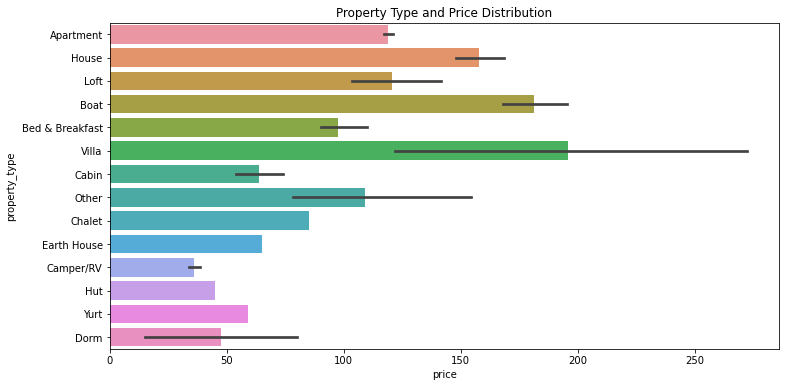

In [17]:
#Plotting Price Distribution and property


plt.figure(figsize = (12,6))
sns.barplot(x='price',y='property_type',data = airbnb_new)

plt.title('Property Type and Price Distribution')
plt.savefig('Property Type and Price Distribution',dpi = 200, bbox_inches = 'tight')

plt.show()

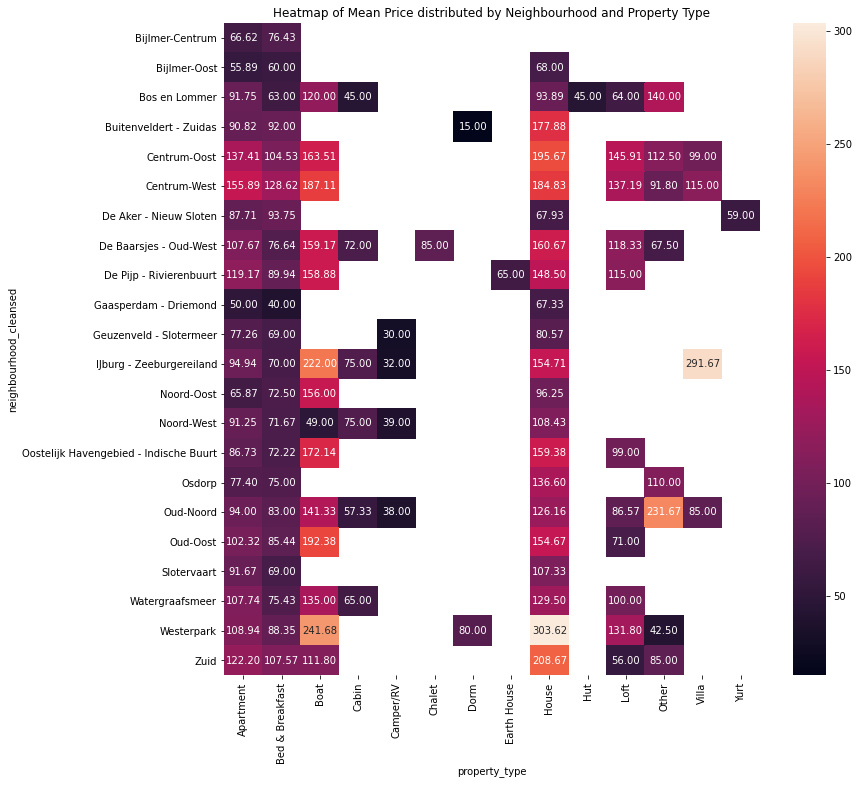

In [18]:
plt.figure(figsize = (12,12))
sns.heatmap(airbnb_new.groupby(['neighbourhood_cleansed','property_type']).price.mean().unstack(),annot = True, fmt = '.2f')
plt.title('Heatmap of Mean Price distributed by Neighbourhood and Property Type')
plt.savefig('Heatmap',dpi = 200,bbox_inches = 'tight')
plt.show()

In [24]:
#Find top listings based on revenue


top_listings2 = top_listings.sort_values(by = ['est_total_revenue','review_scores_rating'],ascending = False)

top_listings = airbnb_new.drop(labels =['id','latitude','longitude','guests_included','extra_people','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'], axis = 1)

top_listings2 = top_listings.sort_values(by = ['est_total_revenue','review_scores_rating'],ascending = False)


top_listings2.head(10)

,host_id,host_name,neighbourhood_cleansed,property_type,room_type,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,no_of_stays,est_total_revenue
1312,2314737,Daan,Centrum-West,House,Entire home/apt,4,180,7,180,97.0,360,453600
901,1532319,Anand,Centrum-Oost,Apartment,Entire home/apt,2,123,19,50,97.0,100,233700
724,1294098,Fernando,Centrum-West,House,Entire home/apt,4,230,7,53,99.0,106,170660
1332,2345144,Maurizio,Centrum-West,Apartment,Entire home/apt,4,110,15,48,98.0,96,158400
977,1672823,Ester,De Pijp - Rivierenbuurt,Apartment,Entire home/apt,4,141,2,229,99.0,458,129156
572,965667,Sharon,De Baarsjes - Oud-West,Apartment,Entire home/apt,6,240,3,89,97.0,178,128160
192,276068,The One Roomed Guesthouse-BB,Centrum-West,Bed & Breakfast,Entire home/apt,4,119,3,174,94.0,348,124236
435,680070,Hubert,Centrum-West,House,Entire home/apt,4,220,3,91,99.0,182,120120
102,187580,Monique,Centrum-West,Bed & Breakfast,Entire home/apt,2,139,2,215,97.0,430,119540
1180,2063612,Jan,Centrum-Oost,Apartment,Entire home/apt,4,299,3,64,98.0,128,114816


**Reviews Analysis**

In [25]:
#Looking at descriptive statistics
airbnb_new.review_scores_rating.describe()

count    6175.000000
mean       92.213927
std        12.627660
min         0.000000
25%        90.000000
50%        95.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

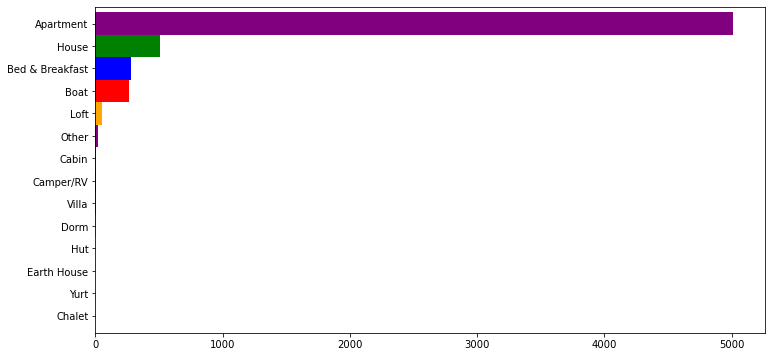

In [26]:
airbnb_new['property_type'].value_counts(ascending = True).plot.barh(figsize=(12,6),width = 1, color =['red','blue','green','purple','orange'])

In [27]:
#Normalising the property type in terms of proportion
airbnb_new['property_type'].value_counts(normalize = True)

Apartment          0.811660
House              0.082591
Bed & Breakfast    0.045830
Boat               0.042915
Loft               0.009069
Other              0.003077
Cabin              0.001457
Camper/RV          0.001457
Villa              0.000972
Dorm               0.000324
Hut                0.000162
Earth House        0.000162
Yurt               0.000162
Chalet             0.000162
Name: property_type, dtype: float64

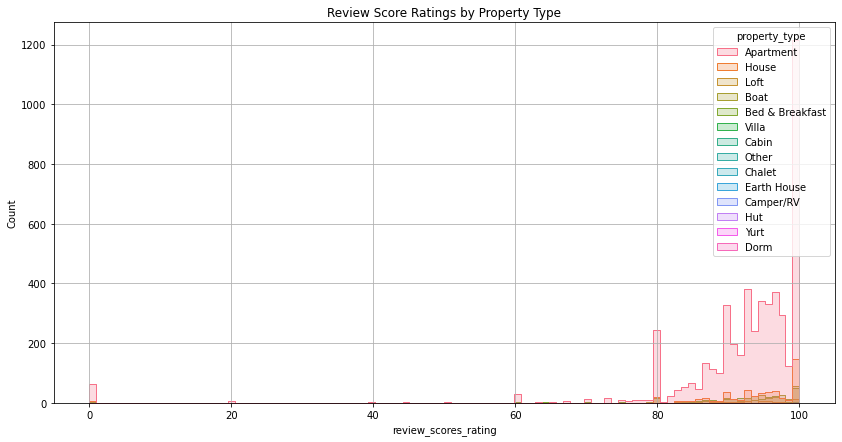

In [28]:
# Doing visualisations of review scores by property
plt.figure(figsize=(14,7))
plt.grid(True)
sns.histplot(x='review_scores_rating', hue='property_type', data = airbnb_new, element='step')
plt.title('Review Score Ratings by Property Type')
plt.savefig('Review Score Ratings by Property Type 1',dpi = 200, bbox_inches = 'tight')
plt.show()

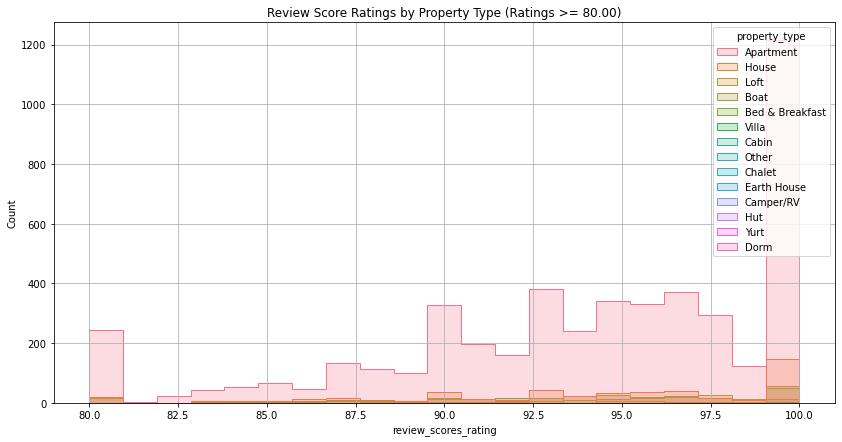

In [29]:
airbnb_reviews = airbnb_new[airbnb_new.review_scores_rating >= 80]

plt.figure(figsize=(14,7))
plt.grid(True)
sns.histplot(x='review_scores_rating', hue='property_type', data = airbnb_reviews, element='step')
plt.title('Review Score Ratings by Property Type (Ratings >= 80.00)')
plt.savefig('Review Score Ratings by Property Type',dpi = 200, bbox_inches = 'tight')
plt.show()

In [30]:
airbnb_new.groupby('property_type').review_scores_rating.describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,5012.0,92.200718,12.843408,0.0,90.0,95.0,99.00,100.0
Bed & Breakfast,283.0,90.738516,12.147242,0.0,88.0,94.0,97.00,100.0
Boat,265.0,93.694340,8.873317,0.0,91.0,96.0,99.00,100.0
Cabin,9.0,85.444444,11.490334,60.0,80.0,88.0,92.00,100.0
Camper/RV,9.0,91.666667,6.244998,80.0,90.0,90.0,96.00,100.0
Chalet,1.0,100.000000,NaN,100.0,100.0,100.0,100.00,100.0
Dorm,2.0,95.000000,7.071068,90.0,92.5,95.0,97.50,100.0
Earth House,1.0,94.000000,NaN,94.0,94.0,94.0,94.00,94.0
House,510.0,92.407843,13.243167,0.0,90.0,95.0,100.00,100.0


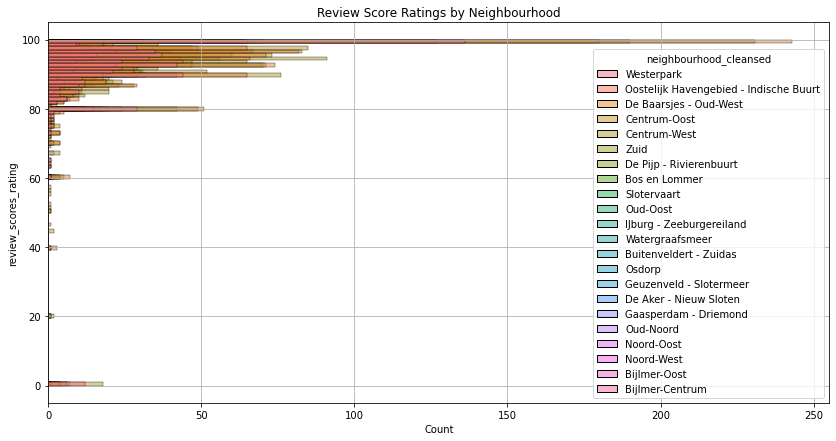

In [31]:
# Doing visualisations of review scores by Neighbourhood

plt.figure(figsize=(14,7))
plt.grid(True)
sns.histplot(y='review_scores_rating', hue='neighbourhood_cleansed', data = airbnb_new, element='bars')
plt.title('Review Score Ratings by Neighbourhood')
plt.savefig('Review Score Ratings by Neighbourhood 1',dpi = 200, bbox_inches = 'tight')
plt.show()

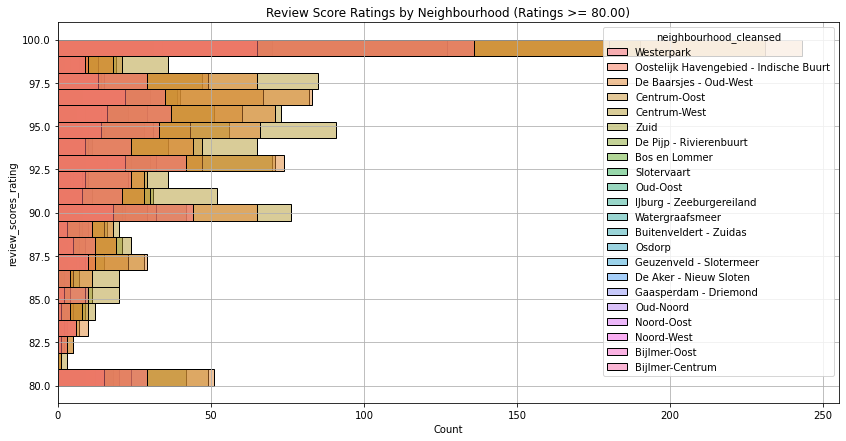

In [32]:
plt.figure(figsize=(14,7))
plt.grid(True)
sns.histplot(y='review_scores_rating', hue='neighbourhood_cleansed', data = airbnb_reviews, element='bars')
plt.title('Review Score Ratings by Neighbourhood (Ratings >= 80.00)')
plt.savefig('Review Score Ratings by Neighbourhood',dpi = 200, bbox_inches = 'tight')
plt.show()

In [33]:
airbnb_new.neighbourhood_cleansed.value_counts(normalize=True)

Centrum-West                              0.184291
De Baarsjes - Oud-West                    0.159514
De Pijp - Rivierenbuurt                   0.121619
Centrum-Oost                              0.120324
Westerpark                                0.088745
Zuid                                      0.068988
Oud-Oost                                  0.049555
Bos en Lommer                             0.044534
Oostelijk Havengebied - Indische Buurt    0.041619
Oud-Noord                                 0.023806
Watergraafsmeer                           0.020405
Slotervaart                               0.017490
IJburg - Zeeburgereiland                  0.011660
Buitenveldert - Zuidas                    0.009879
Noord-West                                0.008583
Geuzenveld - Slotermeer                   0.007611
Osdorp                                    0.005182
Noord-Oost                                0.005182
De Aker - Nieuw Sloten                    0.004211
Bijlmer-Centrum                

In [34]:
airbnb_reviews.groupby('neighbourhood_cleansed').review_scores_rating.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Bijlmer-Centrum,16.0,92.250000,5.756156,80.0,90.75,93.0,94.50,100.0
Bijlmer-Oost,12.0,90.083333,6.331140,80.0,87.75,89.5,93.25,100.0
Bos en Lommer,263.0,93.794677,5.641623,80.0,90.00,95.0,99.00,100.0
Buitenveldert - Zuidas,57.0,94.000000,5.301617,80.0,90.00,94.0,100.00,100.0
Centrum-Oost,715.0,94.622378,5.186176,80.0,92.00,96.0,100.00,100.0
Centrum-West,1086.0,94.022099,5.440035,80.0,91.00,95.0,98.00,100.0
De Aker - Nieuw Sloten,26.0,90.961538,6.062876,80.0,87.00,91.5,95.75,100.0
De Baarsjes - Oud-West,946.0,94.251586,5.600087,80.0,91.00,96.0,100.00,100.0
De Pijp - Rivierenbuurt,734.0,94.100817,5.641464,80.0,91.00,95.0,100.00,100.0


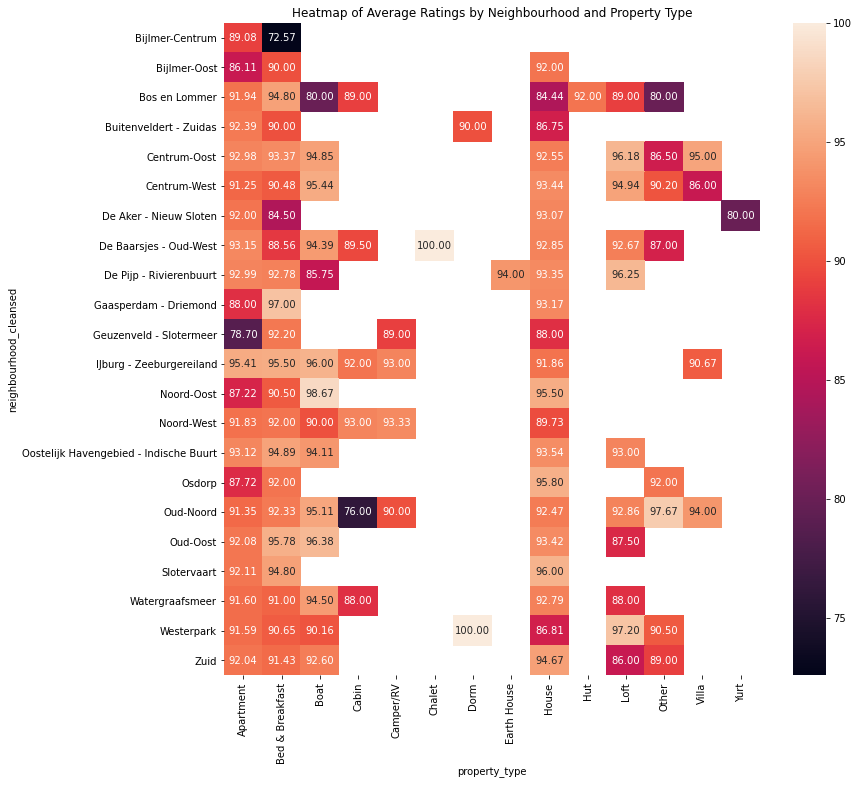

In [39]:
# Doing heatmap of average ratings by neighbourhood and property type

plt.figure(figsize = (12,12))
sns.heatmap(airbnb_new.groupby(['neighbourhood_cleansed','property_type']).review_scores_rating.mean().unstack(),annot = True, fmt = '.2f')
plt.title('Heatmap of Average Ratings by Neighbourhood and Property Type')
plt.savefig('Heatmap of Average Ratings by Neighbourhood and Property Type',dpi = 200, bbox_inches = 'tight')
plt.show()